In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

In [2]:
store_sales=pd.read_csv('data/train.csv',index_col=0)
store_sales_test=pd.read_csv('data/test.csv',index_col=0)
store_sales.head()

,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
id,,,,,,,,,,,,
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68


In [3]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6255 entries, 1 to 6255
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6255 non-null   int64  
 1   Date          6255 non-null   object 
 2   Temperature   6255 non-null   float64
 3   Fuel_Price    6255 non-null   float64
 4   Promotion1    2102 non-null   float64
 5   Promotion2    1592 non-null   float64
 6   Promotion3    1885 non-null   float64
 7   Promotion4    1819 non-null   float64
 8   Promotion5    2115 non-null   float64
 9   Unemployment  6255 non-null   float64
 10  IsHoliday     6255 non-null   bool   
 11  Weekly_Sales  6255 non-null   float64
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 592.5+ KB


In [4]:
store_sales.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
Promotion1      4153
Promotion2      4663
Promotion3      4370
Promotion4      4436
Promotion5      4140
Unemployment       0
IsHoliday          0
Weekly_Sales       0
dtype: int64

In [5]:
store_sales['Date']=pd.to_datetime(store_sales['Date'])

In [6]:
store_sales.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

### promotion column exploration

c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


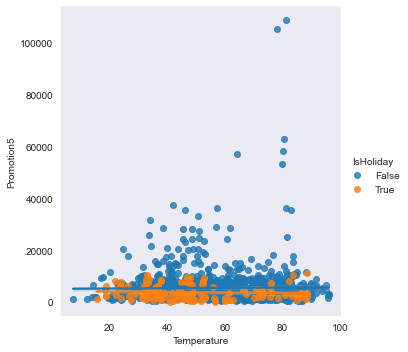

In [7]:
tmpDF=store_sales.dropna()
sns.lmplot('Temperature','Promotion5',data=tmpDF,hue='IsHoliday')

## without promotion column

In [8]:
store_sales_no_promotion=store_sales.drop(['Promotion1',\
    'Promotion2',
    'Promotion3',
    'Promotion4',
    'Promotion5'],axis=1,inplace=False)

In [9]:
labels_no_promotion=store_sales_no_promotion['Weekly_Sales']
attribs_no_promotion=store_sales_no_promotion.drop('Weekly_Sales',axis=1,inplace=False)

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(attribs_no_promotion,labels_no_promotion,test_size=.2,random_state=42)

In [11]:
X_train.shape,X_test.shape

((5004, 6), (1251, 6))

In [12]:
X_train.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
Unemployment    0
IsHoliday       0
dtype: int64

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator,TransformerMixin

class LogScaler(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return np.log1p(X)

In [14]:
X_train.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
Unemployment    0
IsHoliday       0
dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
num_attribs=['Temperature','Fuel_Price','Unemployment']
bool_attribs=['IsHoliday']

num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])

bool_pipeline=Pipeline([
    ('encoder',OrdinalEncoder()),
])

In [17]:
X_train_num=num_pipeline.fit_transform(X_train[num_attribs])
X_train_bool=bool_pipeline.fit_transform(X_train[bool_attribs])

In [18]:
X_train_prepared=np.c_[X_train['Store'],X_train_num,X_train_bool]
X_train_prepared

array([[ 3.        ,  0.91069769,  0.71121179, -0.91623119,  0.        ],
       [23.        , -1.33492533, -0.83597071, -1.48545498,  0.        ],
       [13.        , -0.39527128, -0.95228372,  0.04769792,  0.        ],
       ...,
       [38.        ,  1.47599185,  1.25327431,  2.98134792,  1.        ],
       [39.        ,  0.19147618,  0.63220672, -0.42149036,  0.        ],
       [ 7.        ,  0.0654381 , -1.43070327,  0.54243874,  0.        ]])

In [19]:
pd.DataFrame(X_train_prepared).isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

### model selection

In [20]:
# model load
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import ExtraTreeRegressor
from lightgbm import LGBMRegressor

In [21]:
# load evaluation metrics
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score

In [22]:
from sklearn.model_selection import cross_val_score

In [36]:
rf_reg=RandomForestRegressor(n_estimators=500)
xt_reg=ExtraTreeRegressor()
lgbm_reg=LGBMRegressor()

In [ ]:
scores=cross_val_score(rf_reg,X_train_prepared,y_train,cv=5,scoring='neg_mean_squared_error',error_score='raise')
rmse_scores=np.sqrt(-1*scores)

In [24]:
avg_rmse_scores=rmse_scores.mean()
avg_rmse_scores

156303.24489939254

In [25]:
X_test_num=num_pipeline.fit_transform(X_test[num_attribs])
X_test_bool=bool_pipeline.fit_transform(X_test[bool_attribs])
X_test_prepared=np.c_[X_test['Store'],X_test_num,X_test_bool]

In [26]:
test_scores=cross_val_score(rf_reg,X_test_prepared,y_test,cv=5,scoring='neg_mean_squared_error')
rmse_scores_test=np.sqrt(-1*test_scores)
avg_rmse_scores_test=rmse_scores_test.mean()
avg_rmse_scores_test

199317.13727575185

In [43]:
xt_scores=cross_val_score(xt_reg,X_train_prepared,y_train,cv=5,scoring='neg_mean_squared_error',error_score='raise')
rmse_scores_xt=np.sqrt(-1*xt_scores)
avg_rmse_scores_xt=rmse_scores_xt.mean()
avg_rmse_scores_xt

219949.9574327074

In [44]:
lgbm_scores=cross_val_score(lgbm_reg,X_train_prepared,y_train,cv=5,scoring='neg_mean_squared_error',error_score='raise')
rmse_scores_lgbm=np.sqrt(-1*lgbm_scores)
avg_rmse_scores_lgbm=rmse_scores_lgbm.mean()
avg_rmse_scores_lgbm

138679.3882842064

### learning curve visualize

In [40]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    scoring,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    fig,axes=plt.subplots(1,1,figsize=(7,7))
    axes.set_title(title)
    axes.set_xlabel("number of examples")
    axes.set_ylabel("score")

    train_sizes,train_scores,test_scores,fit_times,_=learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        scoring=scoring,
        train_sizes=train_sizes,
        return_times=True
    )

    train_scores_mean=-1*np.mean(train_scores,axis=1)
    test_scores_mean=-1*np.mean(test_scores,axis=1)

    axes.plot(
        train_sizes,train_scores_mean,"o-",color="r",label="training score"
    )
    axes.plot(
        train_sizes,test_scores_mean,"o-",color="g",label="cross val score"
    )
    axes.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'c:\\Users\\Administrator\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

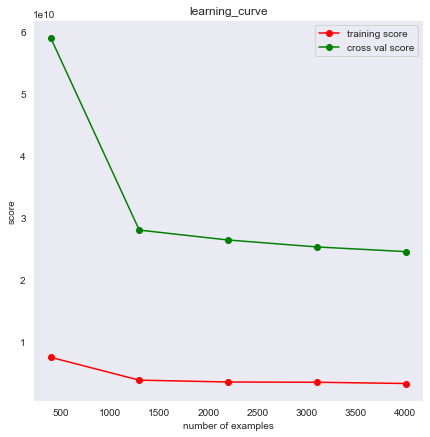

In [42]:
plot_learning_curve(
    rf_reg,"learning_curve",X_train_prepared,y_train,scoring='neg_mean_squared_error',n_jobs=-1
)

# with promotion column

In [23]:
store_sales

,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
id,,,,,,,,,,,,
1,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
2,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
3,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
4,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
5,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...
6251,45,2012-08-31,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6252,45,2012-07-09,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6253,45,2012-09-14,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27


<AxesSubplot:xlabel='id'>

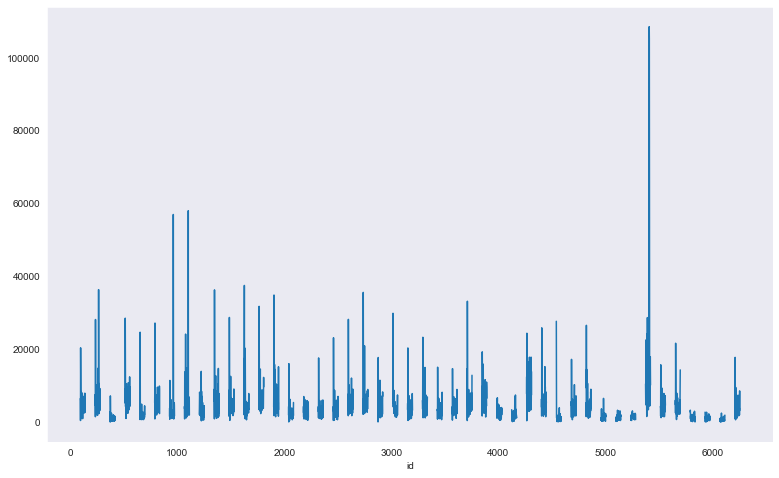

In [24]:
plt.figure(figsize=(13,8))
store_sales.Promotion5.plot()

promotion은 규칙적으로 반복되는 듯하다. 특별한 행사를 주기적으로 하는 것으로 보아 NaN은 0으로 처리하는 것이 좋을 것 같다.

In [23]:
store_sales.Promotion1.iloc[400:500]

id
401    5770.48
402    2014.47
403    1843.45
404    2297.32
405    2625.99
        ...   
496        NaN
497        NaN
498        NaN
499        NaN
500        NaN
Name: Promotion1, Length: 100, dtype: float64

In [39]:
Promotion_columns=\
    [
    'Promotion1',
    'Promotion2',
    'Promotion3',
    'Promotion4',
    'Promotion5'
    ]

In [40]:
for col in Promotion_columns:
    store_sales[col].fillna(0,inplace=True)

In [41]:
store_sales.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
Promotion1      0
Promotion2      0
Promotion3      0
Promotion4      0
Promotion5      0
Unemployment    0
IsHoliday       0
Weekly_Sales    0
dtype: int64

In [42]:
labels_with_promotion=store_sales['Weekly_Sales']
attribs_with_promotion=store_sales.drop('Weekly_Sales',axis=1,inplace=False)

In [43]:
X_train,X_test,y_train,y_test=train_test_split(attribs_with_promotion,labels_with_promotion,test_size=.2,random_state=42)

In [44]:
X_train.shape,X_test.shape

((5004, 11), (1251, 11))

In [45]:
X_train.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'Promotion1',
       'Promotion2', 'Promotion3', 'Promotion4', 'Promotion5', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [46]:
num_attribs=['Temperature', 'Fuel_Price', 'Promotion1','Promotion2', 'Promotion3', 'Promotion4', 'Promotion5', 'Unemployment']

In [47]:
X_train_num=num_pipeline.fit_transform(X_train[num_attribs])
X_train_bool=bool_pipeline.fit_transform(X_train[bool_attribs])
X_test_num=num_pipeline.fit_transform(X_test[num_attribs])
X_test_bool=bool_pipeline.fit_transform(X_test[bool_attribs])

In [48]:
X_train_prepared=np.c_[X_train['Store'],X_train_num,X_train_bool]
X_test_prepared=np.c_[X_test['Store'],X_test_num,X_test_bool]

## model selection

In [50]:
## models: rf_reg,xt_reg,lgbm_reg
train_scores_rf=cross_val_score(rf_reg,X_train_prepared,y_train,cv=5,scoring='neg_mean_squared_error')
train_scores_xt=cross_val_score(xt_reg,X_train_prepared,y_train,cv=5,scoring='neg_mean_squared_error')
train_scores_lgbm=cross_val_score(lgbm_reg,X_train_prepared,y_train,cv=5,scoring='neg_mean_squared_error')

test_scores_rf=cross_val_score(rf_reg,X_test_prepared,y_test,cv=5,scoring='neg_mean_squared_error')
test_scores_xt=cross_val_score(xt_reg,X_test_prepared,y_test,cv=5,scoring='neg_mean_squared_error')
test_scores_lgbm=cross_val_score(lgbm_reg,X_test_prepared,y_test,cv=5,scoring='neg_mean_squared_error')

rmse_train_scores_rf=np.sqrt(-1*train_scores_rf)
avg_rmse_train_scores_rf=rmse_train_scores_rf.mean()
rmse_train_scores_xt=np.sqrt(-1*train_scores_xt)
avg_rmse_train_scores_xt=rmse_train_scores_xt.mean()
rmse_train_scores_lgbm=np.sqrt(-1*train_scores_lgbm)
avg_rmse_train_scores_lgbm=rmse_train_scores_lgbm.mean()

rmse_test_scores_rf=np.sqrt(-1*test_scores_rf)
avg_rmse_test_scores_rf=rmse_test_scores_rf.mean()
rmse_test_scores_xt=np.sqrt(-1*test_scores_xt)
avg_rmse_test_scores_xt=rmse_test_scores_xt.mean()
rmse_test_scores_lgbm=np.sqrt(-1*test_scores_lgbm)
avg_rmse_test_scores_lgbm=rmse_test_scores_lgbm.mean()

In [51]:
pd.DataFrame(
    data=[
            [avg_rmse_train_scores_rf,avg_rmse_train_scores_xt,avg_rmse_train_scores_lgbm],
            [avg_rmse_test_scores_rf,avg_rmse_test_scores_xt,avg_rmse_test_scores_lgbm]
        ],
    columns=['Random Forest','Extra Tree','LGBM'],
    index=['train scores','test scores']
    )

,Random Forest,Extra Tree,LGBM
train scores,147500.553908,237729.100553,132328.743571
test scores,201575.719469,307822.248750,197415.605522


# Submission

In [52]:
sample_submission=pd.read_csv('sample_submission.csv')
sample_submission

,id,Weekly_Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
175,176,0
176,177,0
177,178,0
178,179,0


In [54]:
#labels_with_promotion
attribs_with_promotion[num_attribs]

,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment
id,,,,,,,,
1,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106
2,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106
3,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106
4,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106
5,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106
...,...,...,...,...,...,...,...,...
6251,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684
6252,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684
6253,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684


In [57]:
train_set_num=num_pipeline.fit_transform(attribs_with_promotion[num_attribs])
train_set_bool=bool_pipeline.fit_transform(attribs_with_promotion[bool_attribs])
train_set_prepared=np.c_[attribs_with_promotion['Store'],train_set_num,train_set_bool]
train_set_prepared

array([[ 1.00000000e+00, -9.84244609e-01, -1.69629326e+00, ...,
        -3.71302790e-01,  4.09469975e-02,  0.00000000e+00],
       [ 1.00000000e+00, -1.18829769e+00, -1.74900255e+00, ...,
        -3.71302790e-01,  4.09469975e-02,  1.00000000e+00],
       [ 1.00000000e+00, -1.11204627e+00, -1.82367404e+00, ...,
        -3.71302790e-01,  4.09469975e-02,  0.00000000e+00],
       ...,
       [ 4.50000000e+01,  3.88280843e-01,  1.32570607e+00, ...,
         9.09036505e-01,  3.49258929e-01,  0.00000000e+00],
       [ 4.50000000e+01,  2.51350487e-01,  1.52336591e+00, ...,
         1.73559081e+00,  3.49258929e-01,  0.00000000e+00],
       [ 4.50000000e+01,  2.27723289e-01,  1.43332087e+00, ...,
         4.27736802e-01,  3.49258929e-01,  0.00000000e+00]])

In [58]:
lgbm_reg.fit(train_set_prepared,labels_with_promotion)

LGBMRegressor()

In [59]:
store_sales_test

,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday
id,,,,,,,,,,,
1,1,05/10/2012,68.55,3.617,8077.89,NaN,18.22,3617.43,3626.14,6.573,False
2,1,12/10/2012,62.99,3.601,2086.18,NaN,8.11,602.36,5926.45,6.573,False
3,1,19/10/2012,67.97,3.594,950.33,NaN,4.93,80.25,2312.85,6.573,False
4,1,26/10/2012,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,6.573,False
5,2,05/10/2012,70.27,3.617,6037.76,NaN,10.04,3027.37,3853.40,6.170,False
...,...,...,...,...,...,...,...,...,...,...,...
176,44,26/10/2012,46.97,3.755,38.65,2.61,0.98,NaN,457.74,5.217,False
177,45,05/10/2012,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,8.667,False
178,45,12/10/2012,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,8.667,False


In [60]:
test_set_num=num_pipeline.fit_transform(store_sales_test[num_attribs])
test_set_bool=bool_pipeline.fit_transform(store_sales_test[bool_attribs])
test_set_prepared=np.c_[store_sales_test['Store'],test_set_num,test_set_bool]
test_set_prepared

array([[ 1.        ,  0.67441992, -0.86300567, ...,  0.06087172,
        -0.23953133,  0.        ],
       [ 1.        ,  0.14117129, -0.92142514, ...,  0.86230754,
        -0.23953133,  0.        ],
       [ 1.        ,  0.61879326, -0.94698366, ..., -0.39668297,
        -0.23953133,  0.        ],
       ...,
       [45.        , -0.6759651 ,  0.53541038, ...,  0.18782992,
         1.07794693,  0.        ],
       [45.        , -0.48414905,  0.42222266, ..., -0.66682102,
         1.07794693,  0.        ],
       [45.        , -0.25588795,  0.10456679, ..., -0.90344267,
         1.07794693,  0.        ]])

In [61]:
prediction=lgbm_reg.predict(test_set_prepared)
prediction

array([1574980.81356266, 1529599.10981649, 1555249.81990421,
       1481802.47849851, 1853639.54727878, 2202249.12399803,
       1877399.5088413 , 2022422.14997391,  478715.29183683,
        470743.00926949,  510747.92626629,  483947.49909008,
       2264384.28961792, 2282343.95841124, 2181078.00120282,
       2125481.27723007,  330304.77126846,  314802.14770277,
        365977.79315185,  318280.75886233, 2169111.42285509,
       1359242.79510331, 1493822.09513651, 1481114.28578256,
        576582.94259559,  467041.27483105,  650851.06962894,
        749650.09299728,  854323.18243249,  763646.82538155,
        911839.93341664,  853492.49232195,  563224.21196072,
        520927.93535821,  591366.89284575,  534922.21803691,
       2159231.14898671, 1698800.07496457, 2199172.33692019,
       1735271.6545725 , 1538364.24956213, 1177319.50814791,
       1828084.35580973, 1605063.14267008, 1574795.27846123,
        997461.62137155, 1000406.16447331, 1612653.19019001,
       2383205.14453023,

In [62]:
sample_submission['Weekly_Sales']=prediction
sample_submission

,id,Weekly_Sales
0,1,1.574981e+06
1,2,1.529599e+06
2,3,1.555250e+06
3,4,1.481802e+06
4,5,1.853640e+06
...,...,...
175,176,2.584572e+05
176,177,7.660284e+05
177,178,7.282289e+05
178,179,7.682004e+05


## without promotion

In [47]:
store_sales_test.drop(['Date','Promotion1','Promotion2','Promotion3','Promotion4','Promotion5'],axis=1,inplace=True)

In [48]:
store_sales_test_num=num_pipeline.fit_transform(store_sales_test[num_attribs])
store_sales_test_bool=bool_pipeline.fit_transform(store_sales_test[bool_attribs])

In [49]:
test_data_prepared=np.c_[store_sales_test['Store'],store_sales_test_num,store_sales_test_bool]
test_data_prepared

array([[ 1.00000000e+00,  6.74419920e-01, -8.63005671e-01,
        -2.39531334e-01,  0.00000000e+00],
       [ 1.00000000e+00,  1.41171288e-01, -9.21425140e-01,
        -2.39531334e-01,  0.00000000e+00],
       [ 1.00000000e+00,  6.18793264e-01, -9.46983658e-01,
        -2.39531334e-01,  0.00000000e+00],
       [ 1.00000000e+00,  7.32923817e-01, -1.26829074e+00,
        -2.39531334e-01,  0.00000000e+00],
       [ 2.00000000e+00,  8.39381727e-01, -8.63005671e-01,
        -4.93086129e-01,  0.00000000e+00],
       [ 2.00000000e+00, -5.25629272e-02, -9.21425140e-01,
        -4.93086129e-01,  0.00000000e+00],
       [ 2.00000000e+00,  6.29343147e-01, -9.46983658e-01,
        -4.93086129e-01,  0.00000000e+00],
       [ 2.00000000e+00,  7.93345874e-01, -1.26829074e+00,
        -4.93086129e-01,  0.00000000e+00],
       [ 3.00000000e+00,  1.07627455e+00, -8.63005671e-01,
        -5.78653008e-01,  0.00000000e+00],
       [ 3.00000000e+00,  8.43218048e-01, -9.21425140e-01,
        -5.78653008e-01

In [87]:
rf_reg.fit(train_set_prepared,train_set_labels)
prediction=rf_reg.predict(test_data_prepared)
prediction

array([1547643.37938   , 1536803.25853999, 1595882.2471    ,
       1517121.1436    , 1839425.23402   , 1925699.1481    ,
       1870021.73342   , 1839285.96672   ,  442145.75776   ,
        436417.98612   ,  442630.87694   ,  435848.38736   ,
       2961051.04494001, 2971723.99050001, 2969826.54676001,
       2950719.05020001,  327019.66476   ,  328290.23898   ,
        333490.65136   ,  325424.69292   , 1561098.80132   ,
       1569267.6949    , 1580781.97154   , 1717995.306     ,
        556128.11502   ,  552729.22632   ,  575373.06706   ,
        537548.5608    ,  955977.73922   , 1007501.69348   ,
        964410.75718   ,  949888.575     ,  745651.62666   ,
        748891.39252   ,  745832.6436    ,  744994.80882   ,
       1794205.77868001, 1802545.26252   , 1750397.0046    ,
       1799602.85903999, 1334183.12814   , 1320895.34114   ,
       1344872.46066   , 1339007.91468   ,  965930.12554   ,
       1008172.99464   , 1014627.89376   , 1034226.23338   ,
       1980362.15108   ,

In [51]:
lgbm_reg.fit(X_train_prepared,y_train)
prediction=lgbm_reg.predict(test_data_prepared)
prediction

array([1577674.81495496, 1615607.18117972, 1624965.73115326,
       1504792.63696673, 1900869.67819044, 1895608.53701191,
       1940147.99699403, 1784049.59385344,  429171.3208327 ,
        429171.3208327 ,  476462.237031  ,  381538.23039102,
       2254643.74993125, 2284966.9142249 , 2276817.2648911 ,
       2246947.1646744 ,  315116.80151721,  307104.2041225 ,
        354395.1203208 ,  292939.38777598, 1504869.73307568,
       1532094.98178137, 1545764.80985847, 1540946.91796829,
        480461.27201673,  511865.68233237, 1024641.07512726,
        630988.61610797,  834990.41451775,  837520.31400651,
        944757.9883538 ,  875601.46784784,  569251.75477067,
        518702.69806546,  600734.10822971,  550772.15040442,
       1762827.37321318, 1758896.08861412, 1757504.15017435,
       1753736.19018513, 1327071.46304745, 1327071.46304745,
       1358553.8165065 , 1281678.8454186 ,  996699.12351848,
        997597.84487533, 1022632.84935877, 1029368.50137676,
       1935246.99495521,

In [52]:
sample_submission['Weekly_Sales']=prediction
sample_submission

,id,Weekly_Sales
0,1,1.577675e+06
1,2,1.615607e+06
2,3,1.624966e+06
3,4,1.504793e+06
4,5,1.900870e+06
...,...,...
175,176,3.008189e+05
176,177,7.715593e+05
177,178,8.121766e+05
178,179,7.911312e+05


In [65]:
#sample_submission.to_csv('submission0721_lgbm.csv',index=False)
sample_submission.to_csv('submission/submission0731_lgbm.csv',index=False)

In [66]:
sample_submission

,id,Weekly_Sales
0,1,1.574981e+06
1,2,1.529599e+06
2,3,1.555250e+06
3,4,1.481802e+06
4,5,1.853640e+06
...,...,...
175,176,2.584572e+05
176,177,7.660284e+05
177,178,7.282289e+05
178,179,7.682004e+05
